<a href="https://colab.research.google.com/github/venkat2ram/Python/blob/master/NN_using_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import fetch_openml

Data=fetch_openml('mnist_784')

In [0]:
X,y_actual=Data["data"][:1000]/10000,Data["target"][:1000]

In [0]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

def show_imag(X,y_actual,position):
  img=X[position]
  imag=img.reshape(int(np.sqrt(img.size)),int(np.sqrt(img.size)))
  plt.imshow(imag,cmap = matplotlib.cm.binary, interpolation="nearest")
  plt.show()
  print(y_actual[position]) 

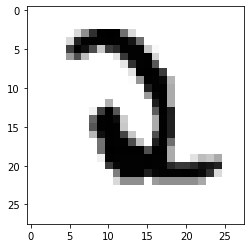

2


In [13]:
show_imag(X,y_actual,400)

In [0]:
def convert_binary(y_actual):
  y1=np.zeros((len(y_actual),10))
  for i in range(len(y_actual)):
    y1[i][int(y_actual[i])]=1
    
    
  return y1

In [0]:
NumHlayers=10
NumHunits=30

In [18]:
y=convert_binary(y_actual)
m,n=np.shape(X)
p,s=np.shape(y)
X_with_bias=np.c_[np.ones((m,1)),X]
hidden=np.ones((NumHlayers,m,NumHunits+1))
z=np.ones((NumHlayers,m,NumHunits))
a=np.ones((NumHlayers,m,NumHunits))
d=np.ones((NumHlayers,m,NumHunits+1))
ITheta=np.random.rand(n+1,NumHunits)
HTheta=np.random.rand(NumHlayers-1,NumHunits+1,NumHunits)
ETheta=np.random.rand(NumHunits+1,s)
z[0]=np.matmul(X_with_bias,ITheta)
a[0]=1/(1+np.exp(-1*z[0]))
hidden[0]=np.c_[np.ones((m,1)),a[0]]
for i in range(NumHlayers-1):
  z[i+1]=np.matmul(hidden[i],HTheta[i])
  a[i+1]=1/(1+np.exp(-1*z[i+1]))
  hidden[i+1]=np.c_[np.ones((m,1)),a[i+1]]
pred=1/(1+np.exp(-1*np.matmul(hidden[i+1],ETheta)))
print(pred[999],y[999])
cost=sum(((pred-y)**2).transpose()).reshape(-1,1)
dpred=pred-y
print(dpred[999],ETheta.shape,dpred.shape)
d[NumHlayers-1]=np.transpose(np.matmul(ETheta,np.transpose(dpred)))
#*(a[NumHlayers]*(1-a[NumHlayers]))
print(d[NumHlayers-1],d[NumHlayers-1].shape,hidden[NumHlayers-1].shape)
#for

[0.99999996 0.99999973 0.99999953 0.99999836 0.9999997  0.99999848
 0.99999977 0.9999999  0.99999986 0.99999989] [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[ 9.99999959e-01  9.99999727e-01  9.99999534e-01  9.99998364e-01
  9.99999705e-01  9.99998482e-01 -2.27866710e-07  9.99999896e-01
  9.99999856e-01  9.99999893e-01] (31, 10) (1000, 10)
[[3.59320136 4.27606069 3.70767554 ... 5.35912738 4.30675309 5.3425251 ]
 [3.29442152 4.69216289 3.64232557 ... 4.95128508 4.24474859 4.67330483]
 [3.76945361 4.68611575 4.08689024 ... 5.72768021 4.43578024 4.61858426]
 ...
 [3.29442152 4.69216289 3.64232557 ... 4.95128508 4.24474859 4.67330483]
 [3.71271102 4.64312052 4.19806998 ... 5.48099626 4.88892946 5.23632633]
 [3.41431804 4.22323039 3.94554791 ... 5.19058312 4.70729034 4.64273431]] (1000, 31) (1000, 31)


In [29]:
print(pred)

[[0.99999996 0.99999973 0.99999953 ... 0.9999999  0.99999986 0.99999989]
 [0.99999996 0.99999973 0.99999953 ... 0.9999999  0.99999986 0.99999989]
 [0.99999996 0.99999973 0.99999953 ... 0.9999999  0.99999986 0.99999989]
 ...
 [0.99999996 0.99999973 0.99999953 ... 0.9999999  0.99999986 0.99999989]
 [0.99999996 0.99999973 0.99999953 ... 0.9999999  0.99999986 0.99999989]
 [0.99999996 0.99999973 0.99999953 ... 0.9999999  0.99999986 0.99999989]]


In [30]:
print(dpred)

[[ 9.99999959e-01  9.99999727e-01  9.99999534e-01 ...  9.99999896e-01
   9.99999856e-01  9.99999893e-01]
 [-4.05583621e-08  9.99999727e-01  9.99999534e-01 ...  9.99999896e-01
   9.99999856e-01  9.99999893e-01]
 [ 9.99999959e-01  9.99999727e-01  9.99999534e-01 ...  9.99999896e-01
   9.99999856e-01  9.99999893e-01]
 ...
 [-4.05583621e-08  9.99999727e-01  9.99999534e-01 ...  9.99999896e-01
   9.99999856e-01  9.99999893e-01]
 [ 9.99999959e-01  9.99999727e-01  9.99999534e-01 ...  9.99999896e-01
   9.99999856e-01  9.99999893e-01]
 [ 9.99999959e-01  9.99999727e-01  9.99999534e-01 ...  9.99999896e-01
   9.99999856e-01  9.99999893e-01]]


In [45]:
sum(((pred-y)**2).transpose()).reshape(-1,1).shape

(1000, 1)